<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/03_44_PCA_Faces_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA EigenFaces - Part 2**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC06_2_3_4.ipynb


In [1]:
# Download the data file allFaces.mat into sample_data folder.

import os
import subprocess  # For executing the wget command

# Define the path to the folder and the filename
folder_path = 'sample_data'
filename = 'allFaces.mat'
file_path = os.path.join(folder_path, filename)

# Check if the folder exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Check if the file exists in the specified folder
if not os.path.exists(file_path):
    # If the file doesn't exist, download it into the folder
    download_command = f"wget -P {folder_path} https://github.com/kursatkara/databook_python/raw/master/DATA/allFaces.mat"
    subprocess.run(download_command, shell=True, check=True)
else:
    print(f"{filename} file already exists in the {folder_path} folder.")


In [2]:
# Loat the data file allFaces.mat to mat_contents.
import scipy.io

# Load the mat file from the specified folder
mat_contents = scipy.io.loadmat(file_path)

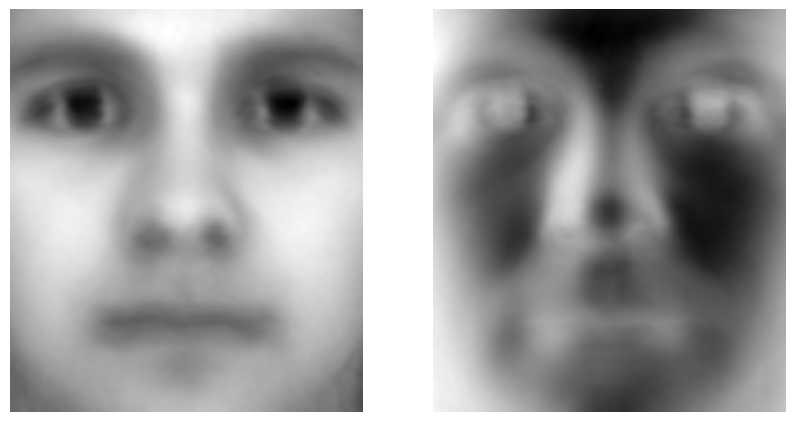

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

# Extract the necessary data
faces       = mat_contents['faces']
m           = int(np.squeeze(mat_contents['m']))
n           = int(np.squeeze(mat_contents['n']))
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]

# Average of the training data
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

In [7]:
print("Data Matrix X, shape:",X.shape," size: ", X.size)

Data Matrix X, shape: (32256, 2282)  size:  73608192


In [9]:
print("U, shape: ", U.shape," size: ", U.size)

U, shape:  (32256, 2282)  size:  73608192


In [10]:
print("S, shape:",S.shape," size: ", S.size)

S, shape: (2282,)  size:  2282


In [11]:
print("VT, shape:",VT.shape," size: ", VT.size)

VT, shape: (2282, 2282)  size:  5207524
